HIV model

In [21]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [32]:
def make_system(gamma, tau, mu, beta, rho, alpha, delta, pi, sigma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R=200, L=1, E=1, V=1)

    t0 = 0
    t_end = 250

    return System(init=init, t0=t0, t_end=t_end,
                  gamma=gamma, tau=tau, mu=mu, 
                  beta=beta, rho=rho, alpha=alpha, 
                  delta=delta, pi=pi, sigma=sigma)

In [33]:
'''def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State
    """
    r, l, e, v = state
    
    cells_in = system.gamma*system.tau
    regular_cell_death = system.mu*r
    latent_infection=system.beta*system.rho*r*v
    active_infection=system.beta*(1-system.rho)*r*v
    latent_death=system.mu*l
    activation_of_latent=system.alpha*l
    active_death=system.delta*e
    virion_in=system.pi*e
    virion_out=system.sigma*v
    
    r += cells_in - regular_cell_death - latent_infection - active_infection
    l += latent_infection - latent_death - activation_of_latent
    e += active_infection + activation_of_latent - active_death
    v += virion_in - virion_out
    
    return State(R=r, L=l, E=e, V=v)'''
def update_func(state,t,system):
    R,L,E,V=state
    deltaE = (1-rho)*beta*R*V + alpha*L - delta*E
    deltaV = pi*E - sigma*V
    deltaR = gamma*tau - mu*R - beta*R*V
    deltaL = rho*beta*R*V - mu*L - alpha*L
    dt = .1
    
    R += deltaR*dt
    L += deltaL*dt
    E += deltaE*dt
    V += deltaV*dt
    
    return R, L, E, V

In [34]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame


In [35]:
system = make_system(1.36, .2, 1.36e-3, .00027, .1, 3.6e-2, .33, 100, 2)
run_simulation(system, update_func)

,R,L,E,V
0,200,1,1,1
1,199.995,0.996804,0.97546,10.8
2,199.936,0.998912,0.999345,18.3946
3,199.837,1.00511,1.05933,24.7091
4,199.704,1.01469,1.14798,30.3606
5,199.54,1.02727,1.26108,35.7683
6,199.347,1.0427,1.3966,41.2255
7,199.126,1.06099,1.55397,46.9464
8,198.873,1.08227,1.73367,53.0968
9,198.588,1.10674,1.93695,59.8141


In [43]:
def plot_results(R, L, E, V):
    plot(R, label='R')
    plot(L, label='L')
    plot(E, label='E')
    plot(V, label='V')

In [ ]:
def plot_results2(R, L, E):
    plot(R, label='R')
    plot(L, label='L')
    plot(E, label='E')
    plot(V, label='V')

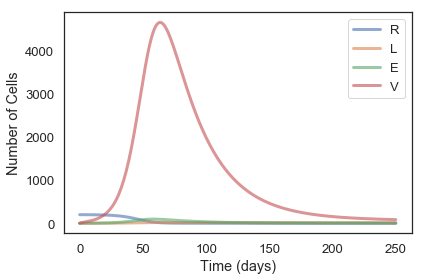

In [47]:
# frame[system.t0] = system.init
# frame.row[system.t0] = system.init
results = run_simulation(system, update_func)
plot_results(results.R, results.L, results.E, results.V)
decorate(xlabel='Time (days)',
        ylabel='Number of Cells')

In [51]:
plot_results(results.R)
plot(results.L, label='L')
plot(results.E, label='E')

TypeError: plot_results() missing 3 required positional arguments: 'L', 'E', and 'V'